## Неделя 1: Практика
### Темы:
#### 1. Математический анализ
#### 2. Линейная алгебра

---

## Математический анализ

In [2]:
# Определим функцию f(x) = x^2

def f(x):
  return x**2

# Проверим, что она принимает те значения, которые мы ожидаем

print(f"Наша функция принимает значение {f(2)} в точке x = 2, должна принимать значение 4")
print(f"Наша функция принимает значение {f(-3)} в точке x = -3, должна принимать значение 9")

Наша функция принимает значение 4 в точке x = 2, должна принимать значение 4
Наша функция принимает значение 9 в точке x = -3, должна принимать значение 9


([-0.99,
  -0.9501,
  -0.9101999999999999,
  -0.8702999999999999,
  -0.8303999999999998,
  -0.7904999999999998,
  -0.7505999999999997,
  -0.7106999999999997,
  -0.6707999999999996,
  -0.6308999999999996,
  -0.5909999999999995,
  -0.5510999999999995,
  -0.5111999999999994,
  -0.47129999999999944,
  -0.43139999999999945,
  -0.39149999999999946,
  -0.35159999999999947,
  -0.3116999999999995,
  -0.2717999999999995,
  -0.2318999999999995,
  -0.1919999999999995,
  -0.1520999999999995,
  -0.11219999999999951,
  -0.0722999999999995,
  -0.0323999999999995,
  0.007500000000000506,
  0.04740000000000051,
  0.08730000000000052,
  0.12720000000000053,
  0.16710000000000053,
  0.20700000000000052,
  0.2469000000000005,
  0.2868000000000005,
  0.3267000000000005,
  0.3666000000000005,
  0.40650000000000047,
  0.44640000000000046,
  0.48630000000000045,
  0.5262000000000004,
  0.5661000000000005,
  0.6060000000000005,
  0.6459000000000006,
  0.6858000000000006,
  0.7257000000000007,
  0.76560000000000

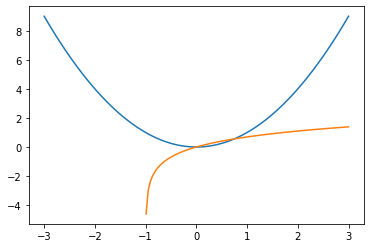

In [27]:
# Определим функцию f(x) = x^2
import math


def f(x):
  return x**2

# Определим функцию f(x) = ln(1 + x)

def g(x):
  return math.log(1+x)

# Нарисуем их! Воспользуемся для этого библиотекой matplotlib

xs = [] # 1. Сформировать множество точек на оси x
fx = [] # 2. Для каждой точки посчитать значение функции f(x)

N = 100
x_left = -10
x_right = 10
x = x_left
for i in range(N+1):
  xs.append(x)
  fx.append(f(x))
  x += (x_right-x_left) / N

# gx = ... # 3. Для каждой точки посчитать значение функции g(x)

from matplotlib import pyplot as plt


def simple_drawer(x_left, x_right, N, func):
  """
  - Функция берет на вход левую и правую границы
  - Количество точек N между левой и правой границами
  - Функцию, которая считает значение в точке

  --> ничего не возвращает, просто рисует график
  """
  xs = [] # 1. Сформировать множество точек на оси x
  fx = [] # 2. Для каждой точки посчитать значение функции func(x)
  x = x_left
  for i in range(N+1):
    xs.append(x)
    fx.append(func(x))
    x += (x_right-x_left) / N
  plt.plot(xs, fx)

  return xs, fx


simple_drawer(-3, 3, 100, f)
simple_drawer(-0.99, 3, 100, g)

In [29]:
# Определим функцию f(x) = x^2 + sin(x) - ln(1 + x)

def f(x):
  return x**2 + math.sin(x) - math.log(1+x)

# Определим функцию g(x) = f'(x) -- производную функции f(x)
# g(x) = 2*x + cos(x) - 1/(1+x)

def g(x):
  return 2*x + math.cos(x) - 1/(1+x)

А что если мы не знаем как аналитически выглядит функция?

Вспомним определие производной:

$$
f'(x_0) = \lim_{x→x_0}\frac{f(x) - f(x_0)}{x - x_0}
$$

Давайте воспользуемся этим знанием!

In [30]:
# Определим функцию g_numerical, которая считает производную f(x) численно

def g_numerical(x, step):
  return (f(x+step) - f(x))/step

# Давайте сравним значение реальной производной и посчитанной численно в разных точках

# В точке x = 0
step = 0.01
x = 0

print('Numerical x=0, g(x)=', g_numerical(x, step))
print('Analytical x=0, g(x)=', g(x))

# В точке x = 100

x=100
print('Numerical x=100, g(x)=', g_numerical(x, step))
print('Analytical x=100, g(x)=', g(x))

Numerical x=0, g(x)= 0.014950248099857184
Analytical x=0, g(x)= 0.0
Numerical x=100, g(x)= 200.8649358074763
Analytical x=100, g(x)= 200.8524178821887


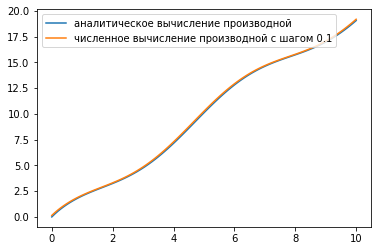

In [35]:
# Нарисуем график функции аналитической производной и посчитанной численно

step = 0.1
x_left = 0
x_right = 10
N = int((x_right-x_left)/step)
xs, ys = simple_drawer(x_left, x_right, N, g)

from functools import partial


xs, ys = simple_drawer(x_left, x_right, N, partial(g_numerical, step=step))

plt.legend(["аналитическое вычисление производной", f'численное вычисление производной с шагом {step}'])

---

## Линейная алгебра

В этом разделе мы познакомимся с библиотекой numpy и с реализациями элементов линейной алгебры в коде.

In [36]:
import numpy as np

In [41]:
# Создадим вектор a = (1, 2, 3) и вектор b = (4, 5, 6)

a = np.array([1,2,3])
b = np.array([4,5,6])

# Произведем операции с векторами:

# Сложение

print("Сложение")
print(a+b)

# Вычитание
print("Вычитание")
print(a-b)

# Умножение на число

print("Умножение на число")
print(5*a)

# *Поэлементное умножение
print("Поэлементное умножение")
print(a*b)

Сложение
[5 7 9]
Вычитание
[-3 -3 -3]
Умножение на число
[ 5 10 15]
Поэлементное умножение
[ 4 10 18]


In [39]:
a.dtype

dtype('int64')

In [40]:
a.append(1)

AttributeError: ignored

In [42]:
# Определим функцию f(x) = x^2 + sin(x) - ln(1 + x)

def f(x):
  return x**2 + np.sin(x) - np.log(1+x)

# Определим функцию g(x) = f'(x) -- производную функции f(x)
# g(x) = 2*x + cos(x) - 1/(1+x)

def g(x):
  return 2*x + np.cos(x) - 1/(1+x)

In [45]:
f(np.array([1,2,3]))

array([1.1483238 , 3.81068514, 7.75482565])

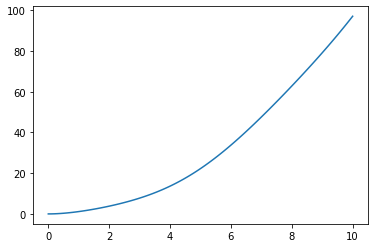

In [46]:
xs = np.linspace(0, 10, 100)
plt.plot(xs, f(xs))

In [47]:
f(xs)

array([0.00000000e+00, 1.48134287e-02, 5.74573756e-02, 1.25548615e-01,
       2.17031177e-01, 3.30101197e-01, 4.63159213e-01, 6.14779634e-01,
       7.83691198e-01, 9.68764579e-01, 1.16900464e+00, 1.38354570e+00,
       1.61164868e+00, 1.85269931e+00, 2.10620693e+00, 2.37180329e+00,
       2.64924133e+00, 2.93839341e+00, 3.23924914e+00, 3.55191244e+00,
       3.87659793e+00, 4.21362655e+00, 4.56342041e+00, 4.92649676e+00,
       5.30346132e+00, 5.69500083e+00, 6.10187489e+00, 6.52490723e+00,
       6.96497642e+00, 7.42300612e+00, 7.89995493e+00, 8.39680596e+00,
       8.91455626e+00, 9.45420608e+00, 1.00167482e+01, 1.06031574e+01,
       1.12143800e+01, 1.18513241e+01, 1.25148496e+01, 1.32057595e+01,
       1.39247911e+01, 1.46726084e+01, 1.54497952e+01, 1.62568485e+01,
       1.70941736e+01, 1.79620797e+01, 1.88607763e+01, 1.97903713e+01,
       2.07508695e+01, 2.17421721e+01, 2.27640783e+01, 2.38162864e+01,
       2.48983975e+01, 2.60099188e+01, 2.71502688e+01, 2.83187831e+01,
      

Вспомним такое важное действие с векторами, как скалярное произведение:

$$\langle a, b \rangle = |a|\cdot |b| \cdot \cos(\alpha) = \sum_i a_i\cdot b_i$$

In [51]:
# Посчитаем скалярное произведение по формуле

def scalar_mul(a,b):
  # TODO: реализовать скалярное произведение
  result = 0
  for i in range(len(a)):
    result += a[i] * b[i]
  return result


print(scalar_mul(a,b))
# Посчитаем скалярное произведение возможностями numpy (np.dot/@)

print(a @ b)

32
32


In [52]:
(a @ b) / (np.sqrt(a @ a) * np.sqrt(b @ b))

0.9746318461970762

In [54]:
A

array([[1, 2],
       [3, 4]])

In [53]:
# Аналогично можно создавать матрицы. 
# Создадим следующие матрицы:
# A = |1,2|  B = |-1, 0|
#     |3,4|      |0 , 1|

A = np.array([[1,2], [3,4]])
B = np.array([[-1, 0], [0, 1]])

# Аналогичные, а также некоторые дополнительные операции можно производить с матрицами:

# Сложение

print("Сложение")
print(f'{A+B}')

# Вычитание
print("Вычитание")
print(f'{A-B}')

# Умножение на число
print("Умножение на число")
print(f'{5*A}')

# Математическое умножение одной матрицы на другую
print("Математическое умножение одной матрицы на другую")
print(f'{A@B}')

# Транспонирование
print("Транспонирование")
print(f'{A.T}')
print(f'{B.T}')

# *Поэлементное умножение одной матрицы на другую
print("*Поэлементное умножение одной матрицы на другую")
print(f'{A*B}')

Сложение
[[0 2]
 [3 5]]
Вычитание
[[2 2]
 [3 3]]
Умножение на число
[[ 5 10]
 [15 20]]
Математическое умножение одной матрицы на другую
[[-1  2]
 [-3  4]]
Транспонирование
[[1 3]
 [2 4]]
[[-1  0]
 [ 0  1]]
*Поэлементное умножение одной матрицы на другую
[[-1  0]
 [ 0  4]]


### **Затравочка к профильному модулю (будет сложно, но интересно!)**

Важным преобразованием над матрицей является нахождение ее определителя.

Для матрицы 2х2 выпишем ее на примере матрицы A:

$$det(A) = det\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} = 1\cdot 4 - 2 \cdot 3 = -2$$

In [55]:
# Напишем функцию, которая считает определитель матрицы 2х2

def det2(A):
  return A[0,0]*A[1,1]-A[1,0]*A[0,1]

# Воспользуемся методами numpy (np.linalg.det)

print(det2(A))
print(np.linalg.det(A))

-2
-2.0000000000000004


Еще одной важной концепцией в линейной алгебре является обратная матрица. Это такая матрица, умножение на которую исходной будет давать единичную (матрица, у которой на диагонали стоят единицы, а в других местах нулы)

$$A^{-1}: AA^{-1} = E$$

In [56]:
# Воспользуемся методами numpy, чтобы найти обратную матрицу к матрице A (np.linalg.inv)

print(f"{np.linalg.inv(A)}")

# Убедимся, что она найдена верно

print(f'{A @ np.linalg.inv(A)}')

[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


Проилюстрируем простым примером-задачей зачем же нам все это может понадобиться.

#### Задача. Решение СЛАУ.
Допустим, что у нас есть 3 параметра стоимости продукта (например, ноутбука). У нас есть матрица $A$ размерности 3 на 3. Каждый столбец соответствует одной из характеристик. Например, объем оперативной памяти в гигабайтах, объем ssd в гигабайтах, наличие или отсутствие видеокарты. Также у нас имеется столбец $b$ размерности 3, отражающий стоимость каждого ноутбука. Мы хотим понять процесс ценообразования, и поэтому хотим найти веса с которыми каждый из параметров влияет на стоимость ноутбука. Итого имеем

$$Ax = b$$

где $x$ -- это столбец из трех неизвестных $x_1,\ x_2,\ x_3$.

Как бы мы записали это все в школе?

Решите это уравнение, и скажите ответ если
$$
\begin{equation*}
A = \left(
\begin{array}{cccc}
4 & 512 & 1 \\
8 & 512 & 0 \\
16 & 256 & 1
\end{array}
\right)
\end{equation*}
$$

$$
\begin{equation*}
b = \left(
\begin{array}{cccc}
50000 \\
54000 \\
75000
\end{array}
\right)
\end{equation*}
$$


$$
x = A^{-1} b
$$

In [57]:
# TODO: решите на бумаге
# ... x1=?, x2=?, x3=?

A = np.array([[4, 512, 1], [8, 512, 0], [16, 256, 1]])
b = np.array([50000, 54000, 75000])

x = np.linalg.inv(A) @ b
x
# ваш код тут, решите систему с помощью numpy

array([3250.    ,   54.6875, 9000.    ])

В нашем случае, система решается, и все переменные оказываются значимыми. Конечно, чаще мы будем иметь дело с ситуацией, когда количество измерений больше, чем количество признаков. Тогда, подобная задача будет называться линейной регрессией. Кроме того, она также будет иметь точное решение, которое можно получить с помощью линейных преобразований.

### Расстояния между векторами

Давайте подумаем на основании чего мы могли бы сказать, что вектора похожи? Где это может быть нужно?

In [ ]:
# Реализуем наши идеи

...

#### Задача. Коллаборативная фильтрация.
Допустим мы хотим рекомендовать новые фильмы, исходя из того какие фильмы пользователь уже посмотрел. Делать мы это будем с оглядкой на других пользователей, наиболее похожих на него.

Предлагается использовать следующую формулу для вычисления рекомендации.

$$r_u^i = k \sum_{u' \in U_N}sim(u,u') \cdot r_{u'}^i$$

Где $u$ -- рассматриваемый пользователь. $U_N$ -- это множество N наиболее близких пользователей к пользователю $u$ (является подмножеством всех пользователей $U$). $i$ -- рассматриваемый фильм. $sim(u,u')$ -- метрика "похожести" двух пользователей, чем она больше, тем бОльший вклад вносит оценка данного пользователя. $k$ -- нормировочный коэффициент.

$$k = \frac{1}{\sum_{u' \in U_N} |sim(u, u')|}$$

В качестве меры похожести предлагается использовать косинус между векторами с оценками фильмов.

Ниже клетка с подготовкой данных, чтобы она заработала, вам нужно загрузить в colab два файла:
1. [ratings_small.csv](https://drive.google.com/file/d/1vLWjMMnbD4tRcklJcOc4mjWQ0oaNx9V6/view?usp=sharing) -- файл с рейтингами фильмов. 
2. [movies_metadata.csv](https://drive.google.com/file/d/1QpoLCUUljSZ1CxzVqDC3PUVZ2qZ7Cfoo/view?usp=sharing) -- файл с метаданными о фильмах (например, их названия).

Сначала эти два файла нужно скачать себе на компьютер, а затем загрузить в окно "файлы" в ноутбуке.

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv("ratings_small.csv")
pvt = pd.pivot_table(data, index="userId", columns="movieId", values="rating", aggfunc="mean", fill_value=0)
meta = pd.read_csv("movies_metadata.csv")
top200ratings = pvt.sum(axis=0).sort_values(ascending=False)[:200].index.sort_values()
myfilms = meta.loc[meta["id"].isin(top200ratings.astype("string")), ["id", "original_title"]]
myfilms['id'] = myfilms['id'].astype(int)
myfilms = myfilms.sort_values(by="id")
myfilms = myfilms.reset_index()
mytop100 = myfilms[['id', 'original_title']][:100]
X = pvt.loc[:,mytop100['id'].sort_values()].to_numpy()
ids_titles = mytop100['original_title'].to_dict()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


На выходе у нас две сокращенных структуры.

1. X -- матрица оценок. Каждой строчке соответствует пользователь, а каждому столбцу соответствует фильм.
2. ids_titles -- словарь в котором каждому номеру столбца из матрицы X сопоставляется название фильма. Пригодится нам для красивого отображения рекомендаций.

Мы рассмотрим с вами два варианта решения. Сначала мы напишем все так, будто numpy тут вообще не при чем, а затем отдельными кусками покажем как то же самое можно было сделать с помощью операций с матрицами и векторами.

##### Вариант 1

In [ ]:
def get_similarities(X, ID):
  """
  Возвращает меру похожести всех пользователей с выбранным нами пользователем с id ID.
  ID также участвует в вычислениях, специально его исключать не нужно.
  """
  res = []
  vec = X[ID]
  for row in X:
    # TODO: сначала надо посчитать числитель

    # TODO: затем квадраты модулей каждого вектора

    # TODO: затем квадраты модулей каждого вектора

    # и затем добавить результат вычисления в возвращаемый список
    res.append(dot / ((np.sqrt(module_row) + 0.0000001)*(np.sqrt(module_id) + 0.0000001)))

  return res


def get_top_similarities_uids(similarities, N):
  """
  Имея список похожестей для нашего пользователя, нужно выбрать топ N id пользователей 
  по которым мы будем делать предсказание для нашего пользователя ID.
  """
  uids_similarities = list(zip(range(len(similarities)), similarities))
  uids_similarities = sorted(uids_similarities, key=lambda pair: pair[1], reverse=True)

  # здесь мы берем топ N похожих пользователей. Первого мы пропускаем, поскольку это сам пользователь
  top_uids = [pair[0] for pair in uids_similarities[1:N+1]]
  return top_uids


def get_recommendation(X, similarities, top_uids):
  """
  Возвращает список рекоммендаций, отсортированных от наиболее подходящих к наименее подходящим, 
  а также словарь в котором каждому id фильма сопоставлен score (значение r)
  """
  similarities_cut = []
  X_cut = []
  # TODO: отфильтруйте X и similarities по топовым пользователям
  

  # TODO: вычислите нормировочный коэффициент k

  prediction = []
  # TODO: заполните список предсказаний


  # просто формируем из списка предсказаний возвращаемые структуры
  prediction_dict = dict(zip(range(0, len(prediction)), prediction,))
  top_recommendations = sorted(prediction_dict, key=lambda k: prediction_dict[k], reverse=True)
  return top_recommendations, prediction_dict


def print_recommendations(X, 
                          ID, 
                          top_recommendations, 
                          scores_dict, 
                          ids_titles,
                          max_recommendations=5
                          ):
  """
  Печатает на экран фильмы, которые пользователь смотрел и список рекомендаций, но не более
  max_recommendations.
  """
  print("Смотрел")

  for idx, rate in enumerate(X[ID]):
    if rate > 0:
      print(ids_titles[idx], rate)

  print()
  print()

  print("Не смотрел")
  rec_showed = 0
  for movieid in top_recommendations:
    if X[ID, movieid] > 0:
      continue
    else:
      rec_showed += 1
      print(f"{ids_titles[movieid]}, {scores_dict[movieid]:.2f}")
      if rec_showed == max_recommendations:
        break

In [ ]:
# ID пользователя для которого будем делать рекомендации
ID = 200
N = 5 # X.shape[0] # топ N ближайших пользователей
X[ID]

array([0., 5., 0., 0., 0., 0., 0., 5., 0., 0., 5., 4., 4., 0., 0., 0., 0.,
       5., 0., 0., 5., 5., 0., 4., 5., 0., 0., 0., 0., 4., 0., 4., 4., 0.,
       0., 0., 4., 5., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 4., 4., 0.,
       0., 4., 4., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0.,
       0., 5., 0., 0., 5., 0., 0., 2., 0., 0., 4., 0., 0., 0., 5.])

In [ ]:
%%time
similarities = get_similarities(X, ID)
top_uids = get_top_similarities_uids(similarities, N)
top_recommendations, scores_dict = get_recommendation(X, similarities, top_uids)
print_recommendations(X, ID, top_recommendations, scores_dict, ids_titles)

Смотрел
Judgment Night 5.0
Trois couleurs : Rouge 5.0
48 Hrs. 5.0
Lost in Translation 4.0
Back to the Future Part II 4.0
The 39 Steps 5.0
A River Runs Through It 5.0
Terminator 3: Rise of the Machines 5.0
Halbe Treppe 4.0
The Million Dollar Hotel 5.0
Crustacés et coquillages 4.0
A Nightmare on Elm Street 4.0
Rain Man 4.0
Sissi 4.0
Monsoon Wedding 5.0
Once Were Warriors 4.0
The Conversation 4.0
Солярис 4.0
Men in Black II 4.0
La belle et la bête 4.0
La passion de Jeanne d'Arc 4.0
Qui a tué Bambi ? 4.0
Light of Day 5.0
Reign Over Me 5.0
Young and Innocent 2.0
The Searchers 4.0
And Then There Were None 5.0


Не смотрел
The Hours, 2.20
Silent Hill, 2.17
Say Anything..., 1.79
Live and Let Die, 1.71
The Dark, 1.60


##### Вариант 2
C использованием numpy и матричного умножения

In [ ]:
def get_similarities(X, ID):
  """
  Возвращает меру похожести всех пользователей с выбранным нами пользователем с id ID.
  ID также участвует в вычислениях, специально его исключать не нужно.
  """
  pass
  return cosines

def get_recommendation(X, similarities, top_uids):
  """
  Возвращает список рекоммендаций, отсортированных от наиболее подходящих к наименее подходящим, 
  а также словарь в котором каждому id фильма сопоставлен score (значение r)
  """
  pass
  prediction_dict = dict(zip(range(0, len(prediction)), prediction,))
  top_recommendations = sorted(prediction_dict, key=lambda k: prediction_dict[k], reverse=True)
  return top_recommendations, prediction_dict

In [ ]:
# ID пользователя для которого будем делать рекомендации
ID = 200
N = 5 # X.shape[0] # топ N ближайших пользователей
X[ID]

array([0., 5., 0., 0., 0., 0., 0., 5., 0., 0., 5., 4., 4., 0., 0., 0., 0.,
       5., 0., 0., 5., 5., 0., 4., 5., 0., 0., 0., 0., 4., 0., 4., 4., 0.,
       0., 0., 4., 5., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 4., 4., 0.,
       0., 4., 4., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0.,
       0., 5., 0., 0., 5., 0., 0., 2., 0., 0., 4., 0., 0., 0., 5.])

In [ ]:
%%time
similarities = get_similarities(X, ID)
top_uids = get_top_similarities_uids(similarities, N)
top_recommendations, scores_dict = get_recommendation(X, similarities, top_uids)
print_recommendations(X, ID, top_recommendations, scores_dict, ids_titles)

Смотрел
Judgment Night 5.0
Trois couleurs : Rouge 5.0
48 Hrs. 5.0
Lost in Translation 4.0
Back to the Future Part II 4.0
The 39 Steps 5.0
A River Runs Through It 5.0
Terminator 3: Rise of the Machines 5.0
Halbe Treppe 4.0
The Million Dollar Hotel 5.0
Crustacés et coquillages 4.0
A Nightmare on Elm Street 4.0
Rain Man 4.0
Sissi 4.0
Monsoon Wedding 5.0
Once Were Warriors 4.0
The Conversation 4.0
Солярис 4.0
Men in Black II 4.0
La belle et la bête 4.0
La passion de Jeanne d'Arc 4.0
Qui a tué Bambi ? 4.0
Light of Day 5.0
Reign Over Me 5.0
Young and Innocent 2.0
The Searchers 4.0
And Then There Were None 5.0


Не смотрел
The Hours, 2.20
Silent Hill, 2.17
Say Anything..., 1.79
Live and Let Die, 1.71
The Dark, 1.60


## Подведем итог того, что мы узнали

1. **Узнали:** Как численно считать производные функций.  
    **Как будем использовать:** Будем находить минимумы (н-р расходы) и максимумы (н-р доходы).

2. **Узнали:** Что такое матрицы, вектора и операции над ними.  
    **Как будем использовать:** Многие алгоритмы ML и DL работаю на этих принципах. Будем разбираться как все устроено и даже применим простые знания из линейной алгебры, чтобы сделать алгоритм рекомендаций!)